# Eu escolho aprender - Business Analytics
## Capstone - Analítica preditiva

Neste *template* encontrarão instruções claras para começar a utilizar modelos de analítica preditiva, sem ser necessário conhecer todos os detalhes técnicos associados.

Cada célula do *template* estará focada em realizar uma tarefa simples, tal como:

- Leitura de dados
- Criação de conjuntos de dados de treino e teste
- Execução de algoritmos de ML (*Machine Learning*)
- Validação de resultados
- Exportação de resultados para análise posterior

Para utilizar este *template* é importante notar o seguinte:
- Cada célula contém um texto explicativo sobre o que estará a ser executado
- Não é necessário executar todas as células, apenas as que forem consideradas necessárias para o exercício de cada grupo
- A execução de uma célula pode ser personalizada ou ajustada: os parâmetros que podem alterar serão escritos apenas em **MAIÚSCULAS** e estarão no topo da célula (podem ser feitos outros ajustes diretamente no código, para utilizadores mais experientes)
- Qualquer texto precedido pelo caracter "#" é um comentário para explicar com mais detalhe o objetivo de uma linha específica de código

### Configuração do Ambiente
Inicialmente, é necessário instalar todas as dependências de Python para executar o código. O ficheiro requirements.txt (que deve ser colocado no mesmo diretório que este *template*) contém todas as dependências do projeto. 

O primeiro comando instala tudo o que está listado no ficheiro.

Em seguida, é necessário importar os *packages* de Python utilizados na execução do restante código. Desta forma garantimos que todas as dependências estão carregadas e prontas a utilizar durante a execução.
Os *packages* utilizados serão:
- Pandas - Leitura, análise e manipulação de dados
- SKlearn - Leque alargado de ferramentas para utilização de analítica preditiva
- Matplotlib - Construção de gráficos em Python


In [1]:
# Instalar bibliotecas, apenas necessário correr uma vez ao fazer o setup

# 1. Correr este comando diretamente no terminal (não pode ser corrido no Notebook porque é necessária a instalação desta biblioteca para executar comandos no Notebook)
# pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org ipykernel -U --user --force-reinstall

# 2. Depois de correr o comando acima no terminal, pode ser executada a instalação de todas as dependências já pelo Notebook
%pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org -r requirements.txt

Ignoring contourpy: markers 'python_version >= "3.11" and python_version < "4.0"' don't match your environmentNote: you may need to restart the kernel to use updated packages.
Ignoring cycler: markers 'python_version >= "3.11" and python_version < "4.0"' don't match your environment
Ignoring defusedxml: markers 'python_version >= "3.11" and python_version < "4.0"' don't match your environment
Ignoring et-xmlfile: markers 'python_version >= "3.11" and python_version < "4.0"' don't match your environment
Ignoring fonttools: markers 'python_version >= "3.11" and python_version < "4.0"' don't match your environment
Ignoring joblib: markers 'python_version >= "3.11" and python_version < "4.0"' don't match your environment
Ignoring kiwisolver: markers 'python_version >= "3.11" and python_version < "4.0"' don't match your environment
Ignoring matplotlib: markers 'python_version >= "3.11" and python_version < "4.0"' don't match your environment
Ignoring numpy: markers 'python_version >= "3.11"

In [2]:
import pandas as pd # importação de biblioteca para leitura, análise a manipulação de dados
import sklearn as sk # importação de biblioteca para criação de fluxos de análise preditiva
from matplotlib import pyplot as plt # importação de bilbioteca para obter gráficos

### Leitura de Dados

O Excel será a principal fonte de dados para a solução que iremos desenvolver. Como tal, precisamos de conseguir ler dados para o nosso *workbook* a partir de um ficheiro Excel. Para realizar o processo de leitura de dados é necessário fornecer o caminho para o ficheiro Excel com os dados, assim como o nome da *Sheet* que contém os dados a carregar.

Para proceder à leitura de dados, é necessário alterar os valores das seguintes variáveis:
- `EXCEL_FILE_PATH` - Colocar o caminho completo para o ficheiro no vosso computador, não esquecendo a extensão do ficheiro (`.xlsx` para arquivos Excel normais, `.xlsm` para arquivos Excel com macros).
- `SHEET_NAME` - Nome da *Sheet* Excel onde se encontram os dados a ler. 

Para garantir uma leitura bem sucedidade é importante:
1. Evitar "Merged Cells"
2. Colocar o início da tabela na célula A1 com cabeçalhos.

Após ler os dados do ficheiro Excel, um resumo dos dados carregados aparecerá abaixo da célula para que possamos verificar se tudo foi corretamente importado.

In [37]:
EXCEL_FILE_PATH = r'BD_Final.xlsx' 
SHEET_NAME = 'BD_final'

df = pd.read_excel(EXCEL_FILE_PATH, sheet_name=SHEET_NAME) #Ler os dados do ficheiro para um dataframe Pandas

df #Mostrar sumário dos dados carregados

,location_cd,loc_brand_cd,unit_base_cd,Peso_MC,Tipologia,Rentabilidade m2,N SKUS,OS ECONÓMICOS FOCADOS,OS GENERALISTAS DISCIPLINADOS,OS PAIS PRÁTICOS,OS PROMOCIONAIS ATENTOS,OS SAUDÁVEIS EXIGENTES,OS TRADICIONAIS FREQUENTES,OS URBANOS SOFISTICADOS
0,464,143,11,0.134264,3,7514.764238,189,0.054131,0.071430,0.056249,0.051148,0.415266,0.077330,0.274447
1,463,143,16,0.010010,3,9290.082888,12,0.046931,0.078383,0.051430,0.053347,0.391661,0.099353,0.278895
2,1391,303,25,0.089521,2,5698.738537,9,0.169031,0.121204,0.127594,0.077958,0.186503,0.147924,0.169785
3,291,303,12,0.696464,2,5358.047422,12,0.124337,0.104899,0.106706,0.081490,0.158780,0.150205,0.273584
4,6332,303,13,0.062549,2,6061.980306,8,0.089714,0.132524,0.144302,0.054008,0.183445,0.178943,0.217064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3309,6332,303,12,0.392502,2,6061.980306,12,0.089714,0.132524,0.144302,0.054008,0.183445,0.178943,0.217064
3310,220,303,24,0.000853,2,8351.361797,1,0.131719,0.094124,0.142958,0.047083,0.126764,0.221586,0.235765
3311,244,303,21,0.011920,2,7714.349104,3,0.094487,0.169939,0.115930,0.078732,0.182580,0.189934,0.168397
3312,940,143,3,0.005603,3,4348.317563,0,0.129018,0.118689,0.198945,0.067072,0.150395,0.162410,0.173471


## Transformação de dados - Conversão de variáveis categóricas
Na maioria dos exercícios de analítica preditiva, há variáveis a utilizar que não são valores contínuos, mas categóricos (p.e. género - M/F, nacionalidade - portuguesa/espanhola/..., etc.). Os algoritmos de *Machine Learning* usam apenas valores numéricos na sua computação, pelo que precisamos de conseguir converter as variáveis categóricas em variáveis numéricas.

Existem várias abordagens para transformar valores categóricos, que devem ser adequadas a cada caso. Neste *template*, teremos duas opções disponíveis:

#### 1. Codificador Ordinal 
- **Ordinal Encoder** - Converte cada categoria presente numa variável diretamente num número. Por exemplo, uma pessoa pode ter os atributos ["masculino", "feminino"], ["da Europa", "dos EUA", "da Ásia"], ou ["usa Firefox", "usa Chrome", "usa Safari", "usa Internet Explorer"]. Nesta codificação, uma pessoa com as categorias ["masculino", "dos EUA", "usa Internet Explorer"] seria representada como [0, 1, 3], enquanto um usuário ["feminino", "da Ásia", "usa Chrome"] seria representado como [1, 2, 1].
- **Simple Imputer** - Valores nulos (vazios) serão alterados para um valor específico como -1.
#### 2. *One Hot Encoding*
- **One Hot Encoder** - Converte cada variável categórica em várias colunas, representando cada categoria presente. Por exemplo, uma possível variável categórica seria "género": ["masculino", "feminino"]. Esta variável seria convertida em duas colunas: "género_masculino" e "género_feminino" (representando as categorias ["masculino", "feminino"]). Uma linha com o atributo "masculino" é representada como ["gender_male", "gender_female"]: [1,0] e com o atributo "feminino" é representado como ["gender_male", "gender_female"]: [0,1]. Este tipo de codificação é geralmente preferível, sobretudo se as categorias não tiverem uma relação numérica subjacente (p.e. género ou nacionalidade).

Parâmetros:
- `CATEGORY_COLUMNS` - Nome das colunas com variáveis categóricas
- `ENCODING_TYPE` - Tipo de codificação a utilizar. Selecionar uma de duas opções: 'one hot encoding' ou 'ordinal'
- `NAN_VALUE` - Valor a considerar para as linhas com valores nulos (apenas na codificação ordinal)

In [38]:
CATEGORY_COLUMNS = ['unit_base_cd', 'Tipologia'] #Colunas que contêm variáveis categóricas
ENCODING_TYPE = 'one hot encoding' #Uma de duas opções: 'one hot encoding' ou 'ordinal'
NAN_VALUE = -1 #Valor que será utilizado para preencher vazios


from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

if ENCODING_TYPE == 'ordinal':
    #Criar uma pipeline que converte todas as colunas categóricas usando um OrdinalEncoder e depois preencher os valores nulos com o valor definido no parâmetro NAN_VALUE
    preprocessor = Pipeline(steps=[
        ('cat', preprocessing.OrdinalEncoder()),
        ('imputer', SimpleImputer(missing_values=NAN_VALUE, strategy='constant'))
    ])

    #Ajustar o pré-processador definido aos dados utilizados
    preprocessor.fit(df[CATEGORY_COLUMNS])

    #Aplicar a transformação
    new_columns = [f'{col}_converted' for col in CATEGORY_COLUMNS]
    df[new_columns] = preprocessor.transform(df[CATEGORY_COLUMNS])
elif ENCODING_TYPE == 'one hot encoding':
    # Inicializar OneHotEncoder
    encoder = preprocessing.OneHotEncoder(sparse_output=False, drop='if_binary')  # drop='first' para lidar com casos em que haja multicolinearidade

    # Tranformar as colunas categóricas
    encoded_cols = encoder.fit_transform(df[CATEGORY_COLUMNS])

    # Criar um DataFrame com as colunas codificadas
    encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(CATEGORY_COLUMNS))

    # Adicionar as colunas codificadas ao dataset original
    df = pd.concat([df, encoded_df], axis=1)
else:
    raise ValueError("O ENCODING_TYPE definido não é suportado. Selecionar uma das seguintes opções: 'one hot encoding' ou 'ordinal'.")

df #Visualizar o dataset após aplicação das transformações

,location_cd,loc_brand_cd,unit_base_cd,Peso_MC,Tipologia,Rentabilidade m2,N SKUS,OS ECONÓMICOS FOCADOS,OS GENERALISTAS DISCIPLINADOS,OS PAIS PRÁTICOS,...,unit_base_cd_19,unit_base_cd_20,unit_base_cd_21,unit_base_cd_22,unit_base_cd_23,unit_base_cd_24,unit_base_cd_25,Tipologia_1,Tipologia_2,Tipologia_3
0,464,143,11,0.134264,3,7514.764238,189,0.054131,0.071430,0.056249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,463,143,16,0.010010,3,9290.082888,12,0.046931,0.078383,0.051430,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1391,303,25,0.089521,2,5698.738537,9,0.169031,0.121204,0.127594,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,291,303,12,0.696464,2,5358.047422,12,0.124337,0.104899,0.106706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,6332,303,13,0.062549,2,6061.980306,8,0.089714,0.132524,0.144302,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3309,6332,303,12,0.392502,2,6061.980306,12,0.089714,0.132524,0.144302,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3310,220,303,24,0.000853,2,8351.361797,1,0.131719,0.094124,0.142958,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3311,244,303,21,0.011920,2,7714.349104,3,0.094487,0.169939,0.115930,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3312,940,143,3,0.005603,3,4348.317563,0,0.129018,0.118689,0.198945,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Criação de conjuntos de dados de treino e teste

Uma das principais tarefas a realizar para treinar corretamente um algoritmo de *Machine Learning* é a divisão entre *datasets* de treino e teste. Isto permite garantir que os dados utilizados para testar o modelo nunca foram observados durante o treino, o que garante uma estimativa da qualidade dos resultados muito mais justa e próxima daquela que podemos esperar observar quando utilizarmos o modelo em ambiente produtivo.

Para realizar o processo de divisão treino/teste, podem ser alteradas as seguintes variáveis, de acordo com o caso de uso:

- `TEST_SIZE` - Percentagem de linhas a considerar para teste dos resultados do modelo. Colocar a percentagem no formato decimal.
- `SHUFFLE_DATA` - "Baralhar" ou não os dados do *dataframe* antes de partir os datasets. Se os dados não apresentarem uma ordem intrínseca (por exemplo, não existe uma coluna de tempo) podem ser completamente "baralhados" (`SHUFFLE_DATA` = True). Caso haja uma ordem subjacente, é importante manter a coerência temporal, pelo que os dados não devem ser "baralhados" (`SHUFFLE_DATA` = False).


No final do processo, esta célula criará dois novos *dataframes* que serão utilizados nas fases seguintes de modelação preditiva:
- `df_train` - *dataframe* que contém os dados que serão usados para treinar o modelo
- `df_test` - *dataframe* que contém os dados que serão usados para testar os resultados modelo

In [47]:
TEST_SIZE = 0.2 # Percentagem dos dados usados para testar o modelo
SHUFFLE_DATA = True # Baralhar os dados antes de fazer a divisão?

from sklearn.model_selection import train_test_split #Importar funcionalidade para fazer divisão treino/teste

#Dividir os dados em treino/teste
df_train, df_test = train_test_split(df, test_size=TEST_SIZE,shuffle=SHUFFLE_DATA)

### Verificação da divisão dos conjuntos de dados
Na próxima célula iremos visualizar a dimensão dos *datasets* criados, assim como um resumo do *dataset* de treino. Para garantir que tudo funcionou corretamente, é importante verificar o seguinte:
- Quantas linhas têm os *datasets*?
- O número de linhas está de acordo com o parâmetro `TEST_SIZE` definido?
- A ordem das linhas faz sentido de acordo com o parâmetro `SHUFFLE_DATA`?

In [40]:
print('Dimensões do dataset de treino: ', df_train.shape) # Sumário do dataset de treino (linhas, colunas)
print('Dimensões do dataset de teste: ', df_test.shape) # Sumário do dataset de teste (linhas, colunas)
df_train # Visualizar linhas do dataset de treino

Dimensões do dataset de treino:  (2651, 42)
Dimensões do dataset de teste:  (663, 42)


,location_cd,loc_brand_cd,unit_base_cd,Peso_MC,Tipologia,Rentabilidade m2,N SKUS,OS ECONÓMICOS FOCADOS,OS GENERALISTAS DISCIPLINADOS,OS PAIS PRÁTICOS,...,unit_base_cd_19,unit_base_cd_20,unit_base_cd_21,unit_base_cd_22,unit_base_cd_23,unit_base_cd_24,unit_base_cd_25,Tipologia_1,Tipologia_2,Tipologia_3
2653,10,143,3,0.003125,3,4950.326065,12,0.097594,0.129221,0.131530,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
534,256,303,1,0.005920,2,10317.636303,0,0.138003,0.115886,0.086813,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3197,294,303,17,0.045234,2,8059.416869,4,0.090633,0.150958,0.132422,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1196,247,303,14,0.001415,2,7696.721527,3,0.120729,0.176844,0.187180,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3000,1392,303,15,0.016635,2,8890.980549,1,0.097626,0.134593,0.115096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2881,3387,303,11,0.159675,2,8623.464155,46,0.111730,0.132153,0.119171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2058,269,303,3,0.002590,2,8834.974758,0,0.124269,0.103414,0.161881,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1742,2087,303,13,0.002772,2,7032.557146,6,0.193424,0.157632,0.236055,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
364,267,303,25,0.045034,2,8041.219450,12,0.103345,0.080235,0.160876,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### Clusterização

Os algoritmos de clusterização (geralmente classificada como aprendizagem não supervisionada) são algoritmos que permitem agrupar os objetos presentes no *dataset* de forma a obter grupos que contenham elementos com características semelhantes. Este tipo de algoritmos permite responder a questões tais como:
- Quais são os tipos de clientes da nossa empresa e o que distingue os vários grupos?
- Como posso agrupar e classificar as minhas lojas? Que grupos de lojas existem?
- Há *outliers* nos meus dados?

Existem inúmeros algoritmos de clusterização. Cada abordagem usa uma definição distinta dos *clusters* e da forma como estes são calculados. Na imagem abaixo (documentação do Sklearn) pode ser visualizada uma comparação dos diferentes algoritmos para diferentes *datasets*:

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png" alt="Cluster comparision reference" style="height: 600px;"/>

Neste *template*, estão disponíveis as seguintes metodologias de clusterização para testar:
- **K-Means** - Algoritmo de uso generalizado, popularmente conhecido e usado para clusterização. Mais adequado para *clusters* de tamanho regular.
- **Ward hierachical clustering** - Número elevado de *clusters* para *datasets* de grande dimensão
- **DBSCAN** - Utilizado para exercícios de *clusterização* com *clusters* de tamanho irregular, com geometrias não planas


#### *K-Means*

O algoritmo *K-Means* cria *n* grupos que minizam a inércia (distância entre pontos que constituem o *cluster*) dentro de cada *cluster*.

Principais observações:
- O algoritmo *K-means* funciona melhor quando os *clusters* são uniformes
- Dado que o número de *clusters* é um parâmetro de inicialização do algoritmo, é importante testar várias opções de forma a garantir que o número de *clusters* obtido é afinado para os dados introduzidos

Parâmetros:
- `NUMBER_OF_CLUSTERS` - Quantidade de *clusters*
- `COLUMNS_TO_USE` - Não é necessário usar todas as colunas para fazer *clusters*, escrever as colunas a utilizar entre '' e separadas por , dentro de []
- `TARGET` - Caso haja uma coluna de validação, definir o nome da coluna para testar a qualidade da clusterização

In [ ]:
NUMBER_OF_CLUSTERS = 3 # Número de clusters a ser definidos no algorimo
COLUMNS_TO_USE = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] # Colunas a utilizar
TARGET = 'species' # Coluna target

from sklearn.cluster import KMeans # Importar o algoritmo KMeans

# Criar o modelo K-Means
kmeans = KMeans(n_clusters=NUMBER_OF_CLUSTERS, init='k-means++', n_init=10)

# Ajustar o modelo aos dados de treino
kmeans.fit(df_train[COLUMNS_TO_USE])

# Prever o cluster para cada linha do dataset de treino
df_train['cluster'] = kmeans.predict(df_train[COLUMNS_TO_USE])

# Para cada linha analisar o cluster selecionado e comparar com a espécie real
df_train.groupby([TARGET])['cluster'].value_counts()


Olhando para os resultados acima, a clusterização foi capaz de identificar corretamente o grupo setosa. Para o grupo versicolor houve 1 *outlier* e para o grupo virginica 9 pontos foram erradamente classificados.

#### Ward Hierarchical clustering

A clusterização hierárquica pertence a uma família de algoritmos de clusterização que constrói clusters em árvore, através da divisão e agrupação sucessiva dos dados. A hierarquia de *clusters* é representada como uma árvore (ou dendrograma).

Este método é inicializado com uma abordagem ascendente em que cada observação começa no seu próprio *cluster*. Os *clusters* são sucessivamente fundidos até chegar à solução final, com base em diferentes critérios. Um desses critérios é o *Ward criterion*, que minimiza a inércia entre novos agrupamentos (similar ao algoritmo *K-means*).

Principais observações:
- Algoritmo adequado para dados com muitas variáveis
- Dado que o número de *clusters* é um parâmetro de inicialização do algoritmo, é importante testar várias opções de forma a garantir que o número de *clusters* obtido é afinado para os dados introduzidos

Parâmetros:
- `NUMBER_OF_CLUSTERS` - Quantidade de *clusters*
- `COLUMNS_TO_USE` - Não é necessário usar todas as colunas para fazer *clusters*, escrever as colunas a utilizar entre '' e separadas por , dentro de []
- `TARGET` - Caso haja uma coluna de validação, definir o nome da coluna para testar a qualidade da clusterização

In [ ]:
NUMBER_OF_CLUSTERS = 3 # Número de clusters a ser definidos no algorimo
COLUMNS_TO_USE = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] # Colunas a utilizar
TARGET = 'species' # Coluna target

from sklearn.cluster import AgglomerativeClustering # Importar o algoritmo AgglomerativeClustering

# Criar o modelo hierárquico
hierarchical = AgglomerativeClustering(n_clusters=NUMBER_OF_CLUSTERS, linkage='ward')

# Ajustar o modelo aos dados de treino
hierarchical.fit(df_train[COLUMNS_TO_USE])

# Prever o cluster para cada linha do dataset de treino
df_train['cluster'] = hierarchical.fit_predict(df_train[COLUMNS_TO_USE])

# Para cada linha analisar o cluster selecionado e comparar com a espécie real
df_train.groupby([TARGET])['cluster'].value_counts()

Olhando para os resultados acima, podemos verificar que desta vez a clusterização foi capaz de identificar corretamente os grupos setosa e versicolor. Apenas para o grupo virginica 13 pontos foram erradamente classificados.

#### DBSCAN

O algoritmo DBSCAN (*Density-Based Spatial Clustering of Applications with Noise*) é um algoritmo que trata os *clusters* como áreas com elevada densidade de informação, separadas por áreas com baixa densidade de informação. Assim, este algoritmo pode ser usado para dados com vários formatos permitindo um maior grau de generalização (ver imagem acima sobre os vários algoritmos de clustering).

O algoritmo DBSCAN pode ser usado para geometrias não planas, clusters de tamanho irregular e remoção de *outliers*.

Principais observações:
- Adequado para *datasets* de grande dimensão
- Resultado final depende muito da parametrização inicial. Requer alguma experiência para fazer um bom ajuste dos parâmetros

Parâmetros:
- `MIN_SAMPLES` - Número de amostras na vizinhança para um ponto poder ser considerado um "ponto nuclear" do *cluster*. Inclui o próprio ponto
- `EPS` - Distância máxima entre dois pontos para que sejam considerados vizinhos. Parâmetro mais impactante do algoritmo
- `COLUMNS_TO_USE` - Não é necessário usar todas as colunas para fazer *clusters*, escrever as colunas a utilizar entre '' e separadas por , dentro de []
- `TARGET` - Caso haja uma coluna de validação, definir o nome da coluna para testar a qualidade da clusterização

In [ ]:
MIN_SAMPLES = 8 # Número de amostras na vizinhança para um ponto poder ser considerado um "ponto nuclear" do cluster
EPS = 0.5 # Distância máxima entre dois pontos para que sejam considerados vizinhos
COLUMNS_TO_USE = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] # Colunas a utilizar
TARGET = 'species' # Coluna target

from sklearn.cluster import DBSCAN # Importar o algoritmo DBSCAN

# Criar o modelo DBSCAN
dbscan = DBSCAN(eps=EPS, min_samples=MIN_SAMPLES)

# Ajustar o modelo aos dados de treino
dbscan.fit(df_train[COLUMNS_TO_USE])

# Prever o cluster para cada linha do dataset de treino
df_train['cluster'] = dbscan.fit_predict(df_train[COLUMNS_TO_USE])

# Para cada linha analisar o cluster selecionado e comparar com a espécie real
df_train.groupby([TARGET])['cluster'].value_counts()

Olhando para os resultados acima, a clusterização por DBSCAN foi capaz de identificar o grupo setosa (classificando erradamente 2 outliers). Para os outros dois grupos, o algoritmo mostrou menor assertividade identificando vários *outliers*.

Alterando os parâmetros `MIN_SAMPLES` e `EPS`, os resultados podem alterar significativamente. Isto acontece porque o algoritmo é muito sensível à parametrização, sobretudo em *datasets* de pequena dimensão.

### Classificação

Os algoritmos de classificação (aprendizagem supervisionada) são uma classe de algoritmos de *Machine Learning* na qual o objetivo é prever se uma determinada observação no *dataset* pertence a uma dada categoria. Por exemplo:
- O meu cliente vai cancelar o serviço no próximo mês?
- O valor atípico de vendas desta semana foi devido a uma promoção?

Os algoritmos de classificação criam fronteiras no *dataset* e cada nova observação é validada face a essas fronteiras de forma a definir a que categoria pertence. A [imagem abaixo](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py) pode ser analisada para comparação dos diferentes algoritmos numa tarefa de classificação binária (azul/vermelho). No canto inferior direito de cada imagem está representada a assertividade do método no dataset em questão.

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png" alt="Classifier comparision reference" style="height: 400px;"/>

Neste *template* vamos focar-nos nos seguintes classificadores:
- **Nearest Neighbors** - Um modelo simples que funciona como uma votação da maioria utilizando a classificação dos vizinhos mais próximos
- **Support Vector Machines (SVM)** - Modelo de alto desempenho, adequado para um grande número de amostras e dimensões
- **Decision Trees** - Método que aprende a classificar novas observações com base numa árvore de decisão que permite separar as observações a partir de regras simples inferidas a partir dos dados de treino
- **Random Forest** - Combinação de várias árvores de decisão, que podem focar-se em prever melhor diferentes partes do *dataset*
- **Logistic Regression** - Regressão *standard* para classificação binária (Sim/Não)

Dado que os modelos são treinados com um *dataset*, esse mesmo conjunto de dados não deve ser usado também para testar a sua qualidade, de forma a evitar *overfit*. Assim, os modelos serão treinados com o *dataset* `df_train` e a qualidade dos resultados será medida com o *dataset* `df_test`.

### *Nearest Neighbors*

O algoritmo *Nearest Neighbors* é um método de aprendizagem "preguiçosa". Neste método o *dataset* de treino é guardado para fazer previsões a partir dos vizinhos mais próximos de uma nova observação. Nenhum modelo é construído durante o processo de treino, simplesmente os dados de treino são guardados para fazer previsões quando é lançada uma nova observação ao modelo.

A classificação é calculada a partir de uma maioria nos votos dos `K_NEIGHBORS` mais próximos de cada ponto, sendo a classe maioritária utilizada para classificar cada nova observação. O parâmetro `WEIGHTS` determina o peso de cada ponto vizinho no cálculo da previsão final. Quando `WEIGHTS`=`uniform` todos os pontos vizinhos têm o mesmo peso, quando `WEIGHTS`=`distance`, o peso de cada ponto vizinho é inversamente proporcional à distância até ao ponto a classificar.

Parâmetros:
- `K_NEIGHBORS` - Número de pontos vizinhos que serão considerados para a classificação
- `WEIGHTS` - Define como são ponderados os "votos" de cada ponto vizinho, os valores podem ser `uniform`, `distance`
- `COLUMNS_TO_USE` - Colunas a utilizar como variáveis para fazer a classificação. Escrever as colunas a utilizar entre '' e separadas por , dentro de []
- `TARGET` - Coluna a prever

In [ ]:
K_NEIGHBORS = 10 # Número de pontos vizinhos que serão considerados para a classificação
WEIGHTS = 'distance' # Define o tipo de peso a considerar: 'distance' ou 'uniform'
COLUMNS_TO_USE = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] # Colunas a utilizar para a classificação
TARGET = 'species'  #Coluna a prever

from sklearn.neighbors import KNeighborsClassifier as KNearestNeighbors # Importa o modelo NearestNeighbors

# Criar o modelo Nearest Neighbors
nn = KNearestNeighbors(K_NEIGHBORS, weights=WEIGHTS)

# Ajusta o modelo aos dados de treino
nn.fit(df_train[COLUMNS_TO_USE], df_train[TARGET])

# Prevê a classificação para cada observação dos datasets de treino e teste
df_test['cluster'] = nn.predict(df_test[COLUMNS_TO_USE])
df_train['cluster'] = nn.predict(df_train[COLUMNS_TO_USE])

print('\nResultados para o dataset de teste: \n')
# Para cada espécie, mostra o número de linhas em cada grupo, permitindo avaliar a qualidade da classificação
print(df_test.groupby([TARGET])['cluster'].value_counts())

# Accuracy do modelo
print('\nA accuracy do modelo é '+ str(nn.score(df_test[COLUMNS_TO_USE], df_test[TARGET])))


print('\nResultados para o dataset de treino: \n')
# Para cada espécie, mostra o número de linhas em cada grupo, permitindo avaliar a qualidade da classificação
print(df_train.groupby([TARGET])['cluster'].value_counts())

# Accuracy do modelo
print('\nA accuracy do modelo é '+ str(nn.score(df_train[COLUMNS_TO_USE], df_train[TARGET])))


#### *Support Vector Machines* (SVM)

As *Support Vector Machines* (tipicamente referidas como SVM) são um método poderoso para tarefas de classificação, permitindo procurar a fronteira ótima que separa diferentes grupos. Este método identifica os vetores de suporte que permitem definir esta fronteira, maximizando a margem entre as classes obtidas de forma a obter uma classificação robusta e precisa para novos pontos.

- `COLUMNS_TO_USE` - Colunas a utilizar como variáveis para fazer a classificação. Escrever as colunas a utilizar entre '' e separadas por , dentro de []
- `TARGET` - Coluna a prever

In [ ]:
COLUMNS_TO_USE = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] # Colunas a utilizar para a classificação
TARGET = 'species' # Coluna a prever

from sklearn import svm # Importar o modelo SVM

# Criar o modelo SVM
svm = svm.SVC(kernel = 'linear') # Tipo de kernel a utilizar. Pode ser definido como: 'rbf', 'linear', 'precomputed', 'sigmoid', 'poly'

# Ajusta o modelo aos dados de treino
svm.fit(df_train[COLUMNS_TO_USE], df_train[TARGET])

# Prevê a classificação para cada observação dos datasets de treino e teste
df_test['cluster'] = svm.predict(df_test[COLUMNS_TO_USE])
df_train['cluster'] = svm.predict(df_train[COLUMNS_TO_USE])

print('\nResultados para o dataset de teste: \n')
# Para cada espécie, mostra o número de linhas em cada grupo, permitindo avaliar a qualidade da classificação
print(df_test.groupby([TARGET])['cluster'].value_counts())

# Accuracy do modelo
print('\nA accuracy do modelo é '+ str(svm.score(df_test[COLUMNS_TO_USE], df_test[TARGET])))


print('\nResultados para o dataset de treino: \n')
# Para cada espécie, mostra o número de linhas em cada grupo, permitindo avaliar a qualidade da classificação
print(df_train.groupby([TARGET])['cluster'].value_counts())

# Accuracy do modelo
print('\nA accuracy do modelo é '+ str(svm.score(df_train[COLUMNS_TO_USE], df_train[TARGET])))


Para o *dataset* Iris, considerado neste exemplo, o modelo SVM tem excelentes resultados. Estes resultados realçam o facto de que há casos em que os modelos mais simples são os que produzem os melhores resultados, sobretudo quando o *dataset* disponível é pequeno.

### *Support Vector Machines* - Coeficientes

Após treinar o modelo, podemos obter os coeficientes que estão a ser utilizados na previsão para cada variável.

Note-se que apenas estamos a obter os coeficientes para uma das classificações de cada vez, neste caso para a classificação setosa. Podem ser obtidos os coeficientes para outras classificações alterando o parâmetro `SVM_CLASSIFICATION_COEFFICIENTS` no topo da célula.

É também muito importante considerar que os coeficientes obtidos dependem da escala das variáveis de entrada, pelo que apenas representam o impacto que uma alteração na variável de entrada tem na variável de saída. É preciso ter cuidado ao fazer interpretações sobre a importância das variáveis na previsão, sendo que essa transferência só pode ser feita quando as variáveis de entrada têm magnitudes semelhantes. Um passo comum a realizar no pré-processamento do *dataset* é escalar as variáveis, de forma a resolver este tipo de limitações.

Parâmetros:
- `SVM_CLASSIFICATION_COEFFICIENTS` - 0,1,2,... representando os diferentes grupos de classificação do nosso problema (no exemplo: setosa, versicolor e virginica)

In [ ]:
SVM_CLASSIFICATION_COEFFICIENTS = 0 #0 para setosa, 1 para versicolor, 2 para virginica

def f_importances(coef, names, title):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.title(title)
    plt.show()

# Obter os coeficientes da SVM
features_names = list(svm.feature_names_in_)
f_importances(svm.coef_[SVM_CLASSIFICATION_COEFFICIENTS], features_names,svm.classes_[SVM_CLASSIFICATION_COEFFICIENTS])

### *Decision Trees*

As árvores de decisão são um grupo de algoritmos no qual as decisões são tomadas numa estrutura semelhante a um gráfico de fluxo, onde nos deslocamos para os resultados percorrendo os vários ramos da árvore de acordo com os dados de entrada. Este tipo de modelos de previsão é construído recursivamente dividindo os dados de treino em subconjuntos que permitam agrupar as observações pertencentes ao mesmo grupo de classificação, de acordo com regras definidas nas variáveis de entrada.

Parâmetros:
- `COLUMNS_TO_USE` - Colunas a utilizar como variáveis para fazer a classificação. Escrever as colunas a utilizar entre '' e separadas por , dentro de []
- `TARGET` - Coluna a prever

In [ ]:
COLUMNS_TO_USE = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] # Colunas a utilizar para a classificação
TARGET = 'species' # Coluna a prever

from sklearn import tree # Importar o modelo Decision Tree

# Criar o modelo Decision Tree
dt = tree.DecisionTreeClassifier()

# Ajusta o modelo aos dados de treino
dt.fit(df_train[COLUMNS_TO_USE], df_train[TARGET])

# Prevê a classificação para cada observação dos datasets de treino e teste
df_test['cluster'] = dt.predict(df_test[COLUMNS_TO_USE])
df_train['cluster'] = dt.predict(df_train[COLUMNS_TO_USE])

print('\nResultados para o dataset de teste: \n')
# Para cada espécie, mostra o número de linhas em cada grupo, permitindo avaliar a qualidade da classificação
print(df_test.groupby([TARGET])['cluster'].value_counts())

# Accuracy do modelo
print('\nA accuracy do modelo é '+ str(dt.score(df_test[COLUMNS_TO_USE], df_test[TARGET])))


print('\nResultados para o dataset de treino: \n')
# Para cada espécie, mostra o número de linhas em cada grupo, permitindo avaliar a qualidade da classificação
print(df_train.groupby([TARGET])['cluster'].value_counts())

# Accuracy do modelo
print('\nA accuracy do modelo é '+ str(dt.score(df_train[COLUMNS_TO_USE], df_train[TARGET])))

#### *Decision Trees* - Visualizar árvore

Uma característica interessante das árvores de decisão é a de podermos obter o processo de decisão utilizado para chegar a uma determinada classificação, através da obtenção da estrutura da árvore de decisão, como pode ser observado abaixo.

Para executar esta célula é necessário executar a célula anterior que treina a árvore de decisão, para que a possamos observar.

In [ ]:
tree.plot_tree(dt, feature_names=COLUMNS_TO_USE, class_names=df_train[TARGET].unique(), filled=True)

#### *Decision Trees* - Importância das variáveis

O gráfico abaixo mostra a importância das variáveis, baseadas no fator *Gini importance*. Para utilizadores mais experientes, há outras formas de analisar a importância de variáveis tais como a *permutation based importance* ou a *SHAP analysis*.

De notar que este valor representa a importância relativa das variáveis, não podendo ser interpretado diretamente como o peso da variável na previsão.

In [ ]:
def f_importances_wo_title(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

# Obter gráfico com a importância das variáveis
f_importances_wo_title(dt.feature_importances_, dt.feature_names_in_)

### *Random Forest*

O algoritmo *Random Forest* é uma técnica de agrupamento de modelos, que constrói múltiplas árvores de decisão de forma a combinar as suas previsão numa previsão final. A previsão é obtida pela média dos resultados de cada árvore individual, reduzindo assim o *overfitting* e aumentando a assertividade das previsões, o que providencia um resultado de classificação (ou regressão) mais robusto e fiável.

Parâmetros:
- `N_ESTIMATORS` - Número de árvores de decisões individuais a serem treinadas para o conjunto. O default é 100
- `COLUMNS_TO_USE` - Colunas a utilizar como variáveis para fazer a classificação. Escrever as colunas a utilizar entre '' e separadas por , dentro de []
- `TARGET` - Coluna a prever

In [ ]:
N_ESTIMATORS = 100 # Número de árvores individuais
COLUMNS_TO_USE = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] # Colunas a utilizar para a classificação
TARGET = 'species' # Coluna a prever

from sklearn.ensemble import RandomForestClassifier # Importar o algoritmo RandomForest

# Criar o modelo Random Forest
rf = RandomForestClassifier(n_estimators=N_ESTIMATORS)

# Ajusta o modelo aos dados de treino
rf.fit(df_train[COLUMNS_TO_USE], df_train[TARGET])

# Prevê a classificação para cada observação dos datasets de treino e teste
df_test['cluster'] = rf.predict(df_test[COLUMNS_TO_USE])
df_train['cluster'] = rf.predict(df_train[COLUMNS_TO_USE])

print('\nResultados para o dataset de teste: \n')
# Para cada espécie, mostra o número de linhas em cada grupo, permitindo avaliar a qualidade da classificação
print(df_test.groupby(['species'])['cluster'].value_counts())

# Accuracy do modelo
print('\nA accuracy do modelo é '+ str(rf.score(df_test[COLUMNS_TO_USE], df_test[TARGET])))


print('\nResultados para o dataset de treino: \n')
# Para cada espécie, mostra o número de linhas em cada grupo, permitindo avaliar a qualidade da classificação
print(df_train.groupby(['species'])['cluster'].value_counts())

# Accuracy do modelo
print('\nA accuracy do modelo é '+ str(rf.score(df_train[COLUMNS_TO_USE], df_train[TARGET])))

Para este exemplo simples, o resultado do algoritmo *Random Forest* é muito similar ao obtido anteriormente para o algoritmo *Decision Tree*. 

#### *Random Forests* - Importância das variáveis

O gráfico abaixo mostra a importância das variáveis, baseadas no fator *Gini importance*. Para utilizadores mais experientes, há outras formas de analisar a importância de variáveis tais como a *permutation based importance* ou a *SHAP analysis*.

De notar que este valor representa a importância relativa das variáveis, não podendo ser interpretado diretamente como o peso da variável na previsão.

In [ ]:
def f_importances_wo_title(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

# Obter gráfico com a importância de variáveis
f_importances_wo_title(rf.feature_importances_, rf.feature_names_in_)

#### Regressão logística

A regressão logística é um método estatístico clássico usado para modelar a probabilidade de um resultado binário, baseado em uma ou mais variáveis de entrada. O algoritmo estima a relação entre as variáveis de entrada e o resultado através do ajuste de uma curva logística, permitindo prever a probabilidade de um evento ocorrer para um conjunto de dados de entrada.

Uma vez que a regressão logística retorna a probabilidade de uma observação pertentecer a uma determinada categoria, pode ser usada também para previsões multi-classe (com mais do que duas classes a prever) selecionando o classificador com a maior probabilidade.

Parâmetros:
- `COLUMNS_TO_USE` - Colunas a utilizar como variáveis para fazer a classificação. Escrever as colunas a utilizar entre '' e separadas por , dentro de []
- `TARGET` - Coluna a prever

In [21]:
COLUMNS_TO_USE = ['location_cd', 'loc_brand_cd', 'Tipologia','Rentabilidade m2', 'N SKUS', 'OS ECONÓMICOS FOCADOS','OS GENERALISTAS DISCIPLINADOS', 'OS PAIS PRÁTICOS',
       'OS PROMOCIONAIS ATENTOS', 'OS SAUDÁVEIS EXIGENTES','OS TRADICIONAIS FREQUENTES', 'OS URBANOS SOFISTICADOS','unit_base_cd_1', 'unit_base_cd_2', 'unit_base_cd_3', 'unit_base_cd_4','unit_base_cd_5', 'unit_base_cd_6', 'unit_base_cd_7', 'unit_base_cd_8',
       'unit_base_cd_9', 'unit_base_cd_10', 'unit_base_cd_11','unit_base_cd_12', 'unit_base_cd_13', 'unit_base_cd_14','unit_base_cd_15', 'unit_base_cd_16', 'unit_base_cd_17',
       'unit_base_cd_18', 'unit_base_cd_19', 'unit_base_cd_20','unit_base_cd_21', 'unit_base_cd_22', 'unit_base_cd_23','unit_base_cd_24', 'unit_base_cd_25', 'Tipologia_1', 'Tipologia_2',
       'Tipologia_3'] # Colunas a utilizar para a classificação
TARGET = 'Peso_MC' # Coluna a prever

from sklearn.linear_model import LogisticRegression # Importar o algoritmo Logistic Regression

# Cria o modelo Logistic Regression
lr = LogisticRegression()

# Ajusta o modelo aos dados de treino
lr.fit(df_train[COLUMNS_TO_USE], df_train[TARGET])

# Prevê a classificação para cada observação dos datasets de treino e teste
df_test['cluster'] = lr.predict(df_test[COLUMNS_TO_USE])
df_train['cluster'] = lr.predict(df_train[COLUMNS_TO_USE])

print('\nResultados para o dataset de teste: \n')
# Para cada espécie, mostra o número de linhas em cada grupo, permitindo avaliar a qualidade da classificação
print(df_test.groupby(['species'])['cluster'].value_counts())

# Accuracy do modelo
print('\nA accuracy do modelo é '+ str(lr.score(df_test[COLUMNS_TO_USE], df_test[TARGET])))


print('\nResultados para o dataset de treino: \n')
# Para cada espécie, mostra o número de linhas em cada grupo, permitindo avaliar a qualidade da classificação
print(df_train.groupby(['species'])['cluster'].value_counts())

# Accuracy do modelo
print('\nA accuracy do modelo é '+ str(lr.score(df_train[COLUMNS_TO_USE], df_train[TARGET])))

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [41]:
df.columns


Index(['location_cd', 'loc_brand_cd', 'unit_base_cd', 'Peso_MC', 'Tipologia',
       'Rentabilidade m2', 'N SKUS', 'OS ECONÓMICOS FOCADOS',
       'OS GENERALISTAS DISCIPLINADOS', 'OS PAIS PRÁTICOS',
       'OS PROMOCIONAIS ATENTOS', 'OS SAUDÁVEIS EXIGENTES',
       'OS TRADICIONAIS FREQUENTES', 'OS URBANOS SOFISTICADOS',
       'unit_base_cd_1', 'unit_base_cd_2', 'unit_base_cd_3', 'unit_base_cd_4',
       'unit_base_cd_5', 'unit_base_cd_6', 'unit_base_cd_7', 'unit_base_cd_8',
       'unit_base_cd_9', 'unit_base_cd_10', 'unit_base_cd_11',
       'unit_base_cd_12', 'unit_base_cd_13', 'unit_base_cd_14',
       'unit_base_cd_15', 'unit_base_cd_16', 'unit_base_cd_17',
       'unit_base_cd_18', 'unit_base_cd_19', 'unit_base_cd_20',
       'unit_base_cd_21', 'unit_base_cd_22', 'unit_base_cd_23',
       'unit_base_cd_24', 'unit_base_cd_25', 'Tipologia_1', 'Tipologia_2',
       'Tipologia_3'],
      dtype='object')

### Regressão Logística - Coeficientes

Após treinar o modelo, podemos obter os coeficientes que estão a ser utilizados na previsão para cada variável.

Note-se que apenas estamos a obter os coeficientes para uma das classificações de cada vez, neste caso para a classificação setosa. Podem ser obtidos os coeficientes para outras classificações alterando o parâmetro `LR_CLASSIFICATION_COEFFICIENTS` no topo da célula.

É também muito importante considerar que os coeficientes obtidos dependem da escala das variáveis de entrada, pelo que apenas representam o impacto que uma alteração na variável de entrada tem na variável de saída. É preciso ter cuidado ao fazer interpretações sobre a importância das variáveis na previsão, sendo que essa transferência só pode ser feita quando as variáveis de entrada têm magnitudes semelhantes.  Um passo comum a realizar no pré-processamento do *dataset* é escalar as variáveis, de forma a resolver este tipo de limitações.

Parâmetros:
- `LR_CLASSIFICATION_COEFFICIENTS` - 0,1,2,... representando os diferentes grupos de classificação do nosso problema (no exemplo: setosa, versicolor e virginica)

In [ ]:
LR_CLASSIFICATION_COEFFICIENTS = 0 #0 para setosa, 1 para versicolor, 2 para virginica

def f_importances(coef, names, title):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.title(title)
    plt.show()

# Obter os coeficientes da SVM
features_names = list(lr.feature_names_in_)
f_importances(lr.coef_[LR_CLASSIFICATION_COEFFICIENTS], features_names,lr.classes_[LR_CLASSIFICATION_COEFFICIENTS])

### Regressão

A regressão (aprendizagem supervisionada) é uma classe de algoritmos de *Machine Learning* centrada na previsão de valores numéricos contínuos com base em variáveis de entrada, identificando as relações entre variáveis. Estes algoritmos ajudam a responder a questões que envolvem a estimativa ou a previsão de quantidades, tais como:
- Qual será o volume de receitas gerado por um determinado cliente?
- Qual será a procura de um produto no próximo trimestre?
- Como é que as alterações nos preços afectam o volume de vendas?

Neste tutorial, vamos focar-nos nos seguintes modelos de regressão:
- **Regressão Linear** - O modelo mais simples consiste numa regressão linear clássica das variáveis independentes com a variável dependente. É um modelo muito interpretável através dos coeficientes da regressão, mas limitado quando as relações entre as variáveis não são lineares.
- **Nearest Neighbors Regression** - Um modelo simples que prevê os valores alvo com base na média dos valores dos vizinhos mais próximos, permitindo uma estimativa suave de resultados contínuos
- **Gradient Boosting Regression** -Técnica de aprendizagem por agrupamento que constrói uma sequência de modelos simples (normalmente árvores de decisão), corrigindo e melhorando iterativamente o desempenho do modelo através da minimização dos erros decorrentes das etapas anteriores
- **Random Forest Regressor** - Um método de aprendizagem por agrupamento robusto que constrói várias árvores de decisão e combina as suas previsões, resultando num resultado de regressão mais preciso e estável através da média das estimativas das árvores individuais

Dado que os modelos são treinados com um *dataset*, esse mesmo conjunto de dados não deve ser usado também para testar a sua qualidade, de forma a evitar *overfit*. Assim, os modelos serão treinados com o *dataset* `df_train` e a qualidade dos resultados será medida com o *dataset* `df_test`.

#### Regressão Linear

A regressão linear é uma abordagem linear para modelar a relação entre uma resposta escalar e uma ou mais variáveis explicativas (também conhecidas como variáveis dependentes e independentes). O caso em que se usa apenas uma variável explicativo é designado por regressão linear simples; para mais do que uma, regressão linear múltipla.

Parâmetros:
- `COLUMNS_TO_USE` - Colunas a utilizar como variáveis para fazer a previsão. Escrever as colunas a utilizar entre '' e separadas por , dentro de []
- `TARGET` - Coluna com os valores a prever

In [70]:
COLUMNS_TO_USE = ['location_cd', 'loc_brand_cd',
       'Rentabilidade m2', 'N SKUS', 'OS ECONÓMICOS FOCADOS',
       'OS GENERALISTAS DISCIPLINADOS', 'OS PAIS PRÁTICOS',
       'OS PROMOCIONAIS ATENTOS', 'OS SAUDÁVEIS EXIGENTES',
       'OS TRADICIONAIS FREQUENTES', 'OS URBANOS SOFISTICADOS',
       'unit_base_cd_1', 'unit_base_cd_2', 'unit_base_cd_3', 'unit_base_cd_4',
       'unit_base_cd_5', 'unit_base_cd_6', 'unit_base_cd_7', 'unit_base_cd_8',
       'unit_base_cd_9', 'unit_base_cd_10', 'unit_base_cd_11',
       'unit_base_cd_12', 'unit_base_cd_13', 'unit_base_cd_14',
       'unit_base_cd_15', 'unit_base_cd_16', 'unit_base_cd_17',
       'unit_base_cd_18', 'unit_base_cd_19', 'unit_base_cd_20',
       'unit_base_cd_21', 'unit_base_cd_22', 'unit_base_cd_23',
       'unit_base_cd_24', 'unit_base_cd_25', 'Tipologia_1', 'Tipologia_2',
       'Tipologia_3'] # Colunas utilizadas para prever o valor target
TARGET = 'Peso_MC' # Coluna a prever - Para este exercício iremos prever a sepal_length

from sklearn.linear_model import LinearRegression # Importar o algoritmo Linear Regression

# Cria o modelo Linear Regression
lnr = LinearRegression(fit_intercept=True)

# Ajusta o modelo aos dados de treino
lnr.fit(X=df_train[COLUMNS_TO_USE], y=df_train[TARGET])

# Prevê a o valor da variável target para cada observação dos datasets de treino e teste
df_test['prediction'] = lnr.predict(df_test[COLUMNS_TO_USE])
df_train['prediction'] = lnr.predict(df_train[COLUMNS_TO_USE])

print('\nO R^2 (coeficiente de assertividade) do modelo nos dados de teste é '+ str(lnr.score(df_test[COLUMNS_TO_USE], df_test[TARGET])))
print('\nO MAPE do moddelo nos dados de teste é '+ str(sum(abs(df_test['prediction']-df_test[TARGET])) / sum(df_test[TARGET])))
print('\nO MPE do moddelo nos dados de teste é '+ str(sum(df_test['prediction']-df_test[TARGET]) / sum(df_test[TARGET])))
# Mostra os resultados para as primeiras 5 linhas do dataset de teste
print('\n')
print(df_test[[TARGET, 'prediction']].head(5))

print('\nO R^2 (coeficiente de assertividade) do modelo nos dados de treino é '+ str(lnr.score(df_train[COLUMNS_TO_USE], df_train[TARGET])))
print('\nO MAPE do moddelo nos dados de treino é '+ str(sum(abs(df_train['prediction']-df_train[TARGET])) / sum(df_train[TARGET])))
print('\nO MPE do moddelo nos dados de treino é '+ str(sum(df_train['prediction']-df_train[TARGET]) / sum(df_train[TARGET])))
# Mostra os resultados para as primeiras 5 linhas do dataset de treino
print('\n')
print(df_train[[TARGET, 'prediction']].head(5))


O R^2 (coeficiente de assertividade) do modelo nos dados de teste é 0.7735465625705885

O MAPE do moddelo nos dados de teste é 0.455133399041518

O MPE do moddelo nos dados de teste é -0.08536322789279413


       Peso_MC  prediction
1108  0.000788   -0.008987
156   0.016694    0.015721
2667  0.023213    0.030726
1223  0.000337   -0.007446
227   0.021968    0.003893

O R^2 (coeficiente de assertividade) do modelo nos dados de treino é 0.7859564664902152

O MAPE do moddelo nos dados de treino é 0.4335516046931344

O MPE do moddelo nos dados de treino é -9.826685607660844e-17


       Peso_MC  prediction
188   0.364260    0.377992
875   0.263610    0.171788
1845  0.010182    0.012548
2247  0.104111    0.069986
900   0.004922    0.011099


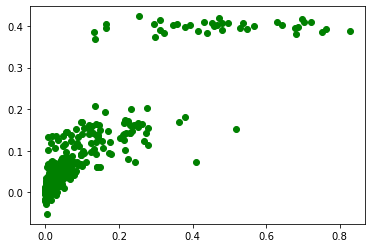

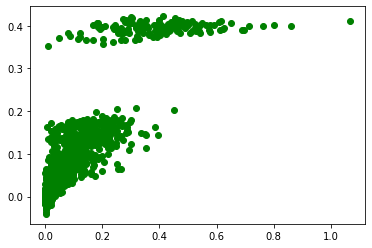

In [71]:
plt.scatter(df_test[TARGET], df_test['prediction'],color='g')
plt.show()

plt.scatter(df_train[TARGET], df_train['prediction'],color='g')
#plt.plot(df_train[TARGET], df_train['prediction'],color='k')
plt.show()

### Regressão Linear - Coeficientes

É muito importante considerar que os coeficientes obtidos dependem da escala das variáveis de entrada, pelo que apenas representam o impacto que uma alteração na variável de entrada tem na variável de saída. É preciso ter cuidado ao fazer interpretações sobre a importância das variáveis na previsão, sendo que essa transferência só pode ser feita quando as variáveis de entrada têm magnitudes semelhantes.  Um passo comum a realizar no pré-processamento do *dataset* é escalar as variáveis, de forma a resolver este tipo de limitações.

In [72]:
df_train.to_excel("df_train_regressaolinear.xlsx")
df_test.to_excel("df_teste_regressaolinear.xlsx")

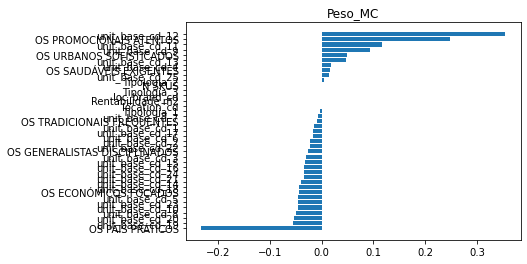

In [49]:
def f_importances(coef, names, title):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.title(title)
    plt.show()

# Obter os coeficientes da regressão linear
features_names = list(lnr.feature_names_in_)
f_importances(lnr.coef_, features_names, TARGET)

#### *Nearest Neighbors Regression*

O método *Nearest Neighbors Regression* é um método de ML baseado em instâncias que prevê a variável objetivo com base numa média dos valores dos pontos vizinhos mais próximos. Este método não cria nenhum modelo, aproveitando a relações entre os pontos de dados para fornecer uma estimativa suave de resultados contínuos.

Parâmetros:

- `K_NEIGHBORS` - Número de pontos vizinhos que serão considerados para obter os valores a usar para a média
- `WEIGHTS` - Define como são ponderados os valores de cada ponto vizinho, os valores podem ser `uniform` (peso igual), `distance` (pontos mais próximos têm um maior peso)
- `COLUMNS_TO_USE` - Colunas a utilizar como variáveis para fazer a previsão. Escrever as colunas a utilizar entre '' e separadas por , dentro de []
- `TARGET` - Coluna com os valores a prever

In [73]:
N_NEIGHBORS = 5 # Número de pontos vizinhos que serão considerados para obter os valores a usar para a média
WEIGHTS = 'distance' # Define como são ponderados os valores de cada ponto vizinho, os valores podem ser `uniform` (peso igual), `distance` (pontos mais próximos têm um maior peso)
COLUMNS_TO_USE = ['location_cd', 'loc_brand_cd',
       'Rentabilidade m2', 'N SKUS', 'OS ECONÓMICOS FOCADOS',
       'OS GENERALISTAS DISCIPLINADOS', 'OS PAIS PRÁTICOS',
       'OS PROMOCIONAIS ATENTOS', 'OS SAUDÁVEIS EXIGENTES',
       'OS TRADICIONAIS FREQUENTES', 'OS URBANOS SOFISTICADOS',
       'unit_base_cd_1', 'unit_base_cd_2', 'unit_base_cd_3', 'unit_base_cd_4',
       'unit_base_cd_5', 'unit_base_cd_6', 'unit_base_cd_7', 'unit_base_cd_8',
       'unit_base_cd_9', 'unit_base_cd_10', 'unit_base_cd_11',
       'unit_base_cd_12', 'unit_base_cd_13', 'unit_base_cd_14',
       'unit_base_cd_15', 'unit_base_cd_16', 'unit_base_cd_17',
       'unit_base_cd_18', 'unit_base_cd_19', 'unit_base_cd_20',
       'unit_base_cd_21', 'unit_base_cd_22', 'unit_base_cd_23',
       'unit_base_cd_24', 'unit_base_cd_25', 'Tipologia_1', 'Tipologia_2',
       'Tipologia_3'] # Colunas utilizadas para prever o valor target
TARGET = 'Peso_MC' # Coluna a prever - Para este exercício iremos prever a sepal_length

from sklearn.neighbors import KNeighborsRegressor # Importar o algoritmo KNeighborsRegressor

# Cria o modelo KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=N_NEIGHBORS, weights=WEIGHTS)

# Ajusta o modelo aos dados de treino
knn.fit(df_train[COLUMNS_TO_USE], df_train[TARGET])

# Prevê a o valor da variável target para cada observação dos datasets de treino e teste
df_test['prediction'] = knn.predict(df_test[COLUMNS_TO_USE])
df_train['prediction'] = knn.predict(df_train[COLUMNS_TO_USE])

print('\nO R^2 (coeficiente de assertividade) do modelo nos dados de teste é '+ str(knn.score(df_test[COLUMNS_TO_USE], df_test[TARGET])))
print('\nO MAPE do moddelo nos dados de teste é '+ str(sum(abs(df_test['prediction']-df_test[TARGET])) / sum(df_test[TARGET])))
print('\nO MPE do moddelo nos dados de teste é '+ str(sum(df_test['prediction']-df_test[TARGET]) / sum(df_test[TARGET])))
# Mostra os resultados para as primeiras 5 linhas do dataset de teste
print('\n')
print(df_test[[TARGET, 'prediction']].head(5))

print('\nO R^2 (coeficiente de assertividade) do modelo nos dados de treino é '+ str(knn.score(df_train[COLUMNS_TO_USE], df_train[TARGET])))
print('\nO MAPE do moddelo nos dados de treino é '+ str(sum(abs(df_train['prediction']-df_train[TARGET])) / sum(df_train[TARGET])))
print('\nO MPE do moddelo nos dados de treino é '+ str(sum(df_train['prediction']-df_train[TARGET]) / sum(df_train[TARGET])))
# Mostra os resultados para as primeiras 5 linhas do dataset de treino
print('\n')
print(df_train[[TARGET, 'prediction']].head(5))



O R^2 (coeficiente de assertividade) do modelo nos dados de teste é -0.03352039513620997

O MAPE do moddelo nos dados de teste é 0.9336192353921868

O MPE do moddelo nos dados de teste é -0.35061700413363134


       Peso_MC  prediction
1108  0.000788    0.028029
156   0.016694    0.044097
2667  0.023213    0.004376
1223  0.000337    0.004622
227   0.021968    0.039314

O R^2 (coeficiente de assertividade) do modelo nos dados de treino é 0.9999999891738273

O MAPE do moddelo nos dados de treino é 4.76846635386014e-05

O MPE do moddelo nos dados de treino é -4.877653791696951e-06


       Peso_MC  prediction
188   0.364260    0.364260
875   0.263610    0.263610
1845  0.010182    0.010182
2247  0.104111    0.104111
900   0.004922    0.004923


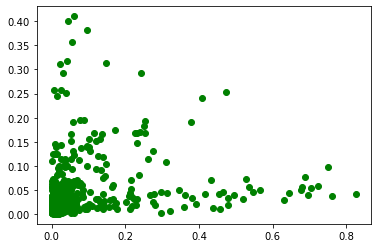

In [74]:
plt.scatter(df_test[TARGET], df_test['prediction'],color='g')
plt.show()

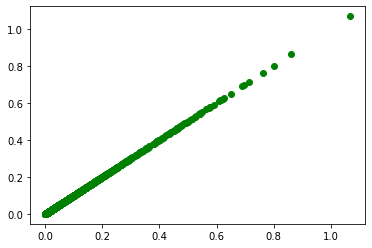

In [75]:
plt.scatter(df_train[TARGET], df_train['prediction'],color='g')
#plt.plot(df_train[TARGET], df_train['prediction'],color='k')
plt.show()

In [76]:
df_train.to_excel("df_train_NearestNeighborsRegression.xlsx")
df_test.to_excel("df_teste_NearestNeighborsRegression.xlsx")

#### *Gradient Boosting Regression*

*Gradient Boosting Regression* é uma técnica de aprendizagem por agrupamento que constrói uma sequência de modelos simples (normalmente árvores de decisão) e melhora iterativamente o modelo, minimizando os erros das etapas anteriores. Cada novo modelo concentra-se na correção dos erros cometidos pelos modelos anteriores, resultando, em última análise, num modelo robusto e preciso.

Parâmetros:

- `N_ESTIMATORS` - Número de modelos simples (árvores de decisão) a utilizar para construir o modelo
- `LEARNING_RATE` - Rácio de aprendizagem utilizado para a otimização do modelo. Rácios maiores podem acelerar o algoritmo, mas também levar a instabilidade e valores não ótimos
- `COLUMNS_TO_USE` - Colunas a utilizar como variáveis para fazer a previsão. Escrever as colunas a utilizar entre '' e separadas por , dentro de []
- `TARGET` - Coluna com os valores a prever

In [77]:
N_ESTIMATORS = 100 # Número de modelos simples (árvores de decisão) a utilizar para construir o modelo
LEARNING_RATE = 0.1 # Rácio de aprendizagem utilizado para a otimização do modelo
COLUMNS_TO_USE = ['location_cd', 'loc_brand_cd',
       'Rentabilidade m2', 'N SKUS', 'OS ECONÓMICOS FOCADOS',
       'OS GENERALISTAS DISCIPLINADOS', 'OS PAIS PRÁTICOS',
       'OS PROMOCIONAIS ATENTOS', 'OS SAUDÁVEIS EXIGENTES',
       'OS TRADICIONAIS FREQUENTES', 'OS URBANOS SOFISTICADOS',
       'unit_base_cd_1', 'unit_base_cd_2', 'unit_base_cd_3', 'unit_base_cd_4',
       'unit_base_cd_5', 'unit_base_cd_6', 'unit_base_cd_7', 'unit_base_cd_8',
       'unit_base_cd_9', 'unit_base_cd_10', 'unit_base_cd_11',
       'unit_base_cd_12', 'unit_base_cd_13', 'unit_base_cd_14',
       'unit_base_cd_15', 'unit_base_cd_16', 'unit_base_cd_17',
       'unit_base_cd_18', 'unit_base_cd_19', 'unit_base_cd_20',
       'unit_base_cd_21', 'unit_base_cd_22', 'unit_base_cd_23',
       'unit_base_cd_24', 'unit_base_cd_25', 'Tipologia_1', 'Tipologia_2',
       'Tipologia_3'] # Colunas utilizadas para prever o valor target
TARGET = 'Peso_MC' # Coluna a prever - Para este exercício iremos prever a sepal_length

from sklearn.ensemble import GradientBoostingRegressor # Importar o algoritmo GradientBoostingRegressor

#Criar o modelo GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=N_ESTIMATORS, learning_rate=LEARNING_RATE)

# Ajusta o modelo aos dados de treino
gb.fit(df_train[COLUMNS_TO_USE], df_train[TARGET])

# Prevê a o valor da variável target para cada observação dos datasets de treino e teste
df_test['prediction'] = gb.predict(df_test[COLUMNS_TO_USE])
df_train['prediction'] = gb.predict(df_train[COLUMNS_TO_USE])

print('\nO R^2 (coeficiente de assertividade) do modelo nos dados de teste é '+ str(gb.score(df_test[COLUMNS_TO_USE], df_test[TARGET])))
print('\nO MAPE do moddelo nos dados de teste é '+ str(sum(abs(df_test['prediction']-df_test[TARGET])) / sum(df_test[TARGET])))
print('\nO MPE do moddelo nos dados de teste é '+ str(sum(df_test['prediction']-df_test[TARGET]) / sum(df_test[TARGET])))
# Mostra os resultados para as primeiras 5 linhas do dataset de teste
print('\n')
print(df_test[[TARGET, 'prediction']].head(5))

print('\nO R^2 (coeficiente de assertividade) do modelo nos dados de treino é '+ str(gb.score(df_train[COLUMNS_TO_USE], df_train[TARGET])))
print('\nO MAPE do moddelo nos dados de treino é '+ str(sum(abs(df_train['prediction']-df_train[TARGET])) / sum(df_train[TARGET])))
print('\nO MPE do moddelo nos dados de treino é '+ str(sum(df_train['prediction']-df_train[TARGET]) / sum(df_train[TARGET])))
# Mostra os resultados para as primeiras 5 linhas do dataset de treino
print('\n')
print(df_train[[TARGET, 'prediction']].head(5))


O R^2 (coeficiente de assertividade) do modelo nos dados de teste é 0.8117409905457265

O MAPE do moddelo nos dados de teste é 0.3966877041419648

O MPE do moddelo nos dados de teste é -0.06826700914216732


       Peso_MC  prediction
1108  0.000788    0.008906
156   0.016694    0.018837
2667  0.023213    0.017007
1223  0.000337    0.008764
227   0.021968    0.019573

O R^2 (coeficiente de assertividade) do modelo nos dados de treino é 0.8951978117431065

O MAPE do moddelo nos dados de treino é 0.31695669979524754

O MPE do moddelo nos dados de treino é -3.4819650177738774e-20


       Peso_MC  prediction
188   0.364260    0.321883
875   0.263610    0.193730
1845  0.010182    0.006300
2247  0.104111    0.058412
900   0.004922    0.007897


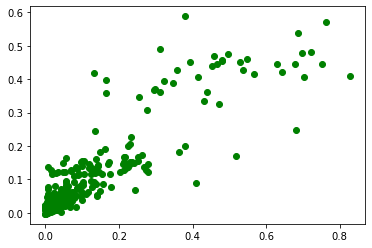

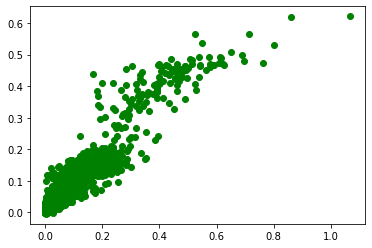

In [64]:
plt.scatter(df_test[TARGET], df_test['prediction'],color='g')
plt.show()

plt.scatter(df_train[TARGET], df_train['prediction'],color='g')
#plt.plot(df_train[TARGET], df_train['prediction'],color='k')
plt.show()

In [ ]:
df_train.to_excel("df_train_gradient.xlsx")
df_test.to_excel("df_teste_gradient.xlsx")

### *Gradient Boosting Regression* - Importância das variáveis

O gráfico abaixo mostra a importância das variáveis com base na impureza (*impurity-based feature importances*). Para utilizadores mais experientes, existem outras formas de análise, por exemplo, a importância baseada na permutação (*permutation-based feature importances*) ou *SHAP Analysis*.

Note-se que representa um valor relativo da importância, não podendo ser interpretado diretamente como o peso da variável na previsão.

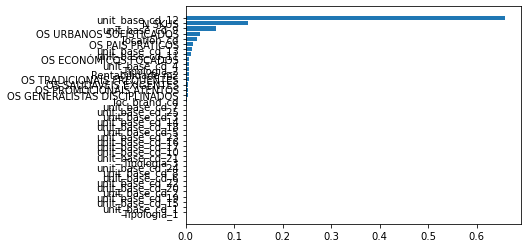

In [62]:
def f_importances_wo_title(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

# Obter a importância das variáveis do GBR
f_importances_wo_title(gb.feature_importances_, gb.feature_names_in_)

#### *Random Forest Regressor*

Random Forest Regressor é um método de agrupamento que constrói várias árvores de decisão e combina as suas previsões para criar um resultado de regressão mais preciso e estável. Ao calcular a média das estimativas das árvores individuais, o modelo reduz o *overfitting* e melhora a generalização para novos pontos de dados.

Parâmetros:

- `N_ESTIMATORS` - Número de árvores de decisão a construir
- `COLUMNS_TO_USE` - Colunas a utilizar como variáveis para fazer a previsão. Escrever as colunas a utilizar entre '' e separadas por , dentro de []
- `TARGET` - Coluna com os valores a prever

In [67]:
N_ESTIMATORS = 100 # Número de árvores de decisão a construir para o modelo
COLUMNS_TO_USE = ['location_cd', 'loc_brand_cd',
       'Rentabilidade m2', 'N SKUS', 'OS ECONÓMICOS FOCADOS',
       'OS GENERALISTAS DISCIPLINADOS', 'OS PAIS PRÁTICOS',
       'OS PROMOCIONAIS ATENTOS', 'OS SAUDÁVEIS EXIGENTES',
       'OS TRADICIONAIS FREQUENTES', 'OS URBANOS SOFISTICADOS',
       'unit_base_cd_1', 'unit_base_cd_2', 'unit_base_cd_3', 'unit_base_cd_4',
       'unit_base_cd_5', 'unit_base_cd_6', 'unit_base_cd_7', 'unit_base_cd_8',
       'unit_base_cd_9', 'unit_base_cd_10', 'unit_base_cd_11',
       'unit_base_cd_12', 'unit_base_cd_13', 'unit_base_cd_14',
       'unit_base_cd_15', 'unit_base_cd_16', 'unit_base_cd_17',
       'unit_base_cd_18', 'unit_base_cd_19', 'unit_base_cd_20',
       'unit_base_cd_21', 'unit_base_cd_22', 'unit_base_cd_23',
       'unit_base_cd_24', 'unit_base_cd_25', 'Tipologia_1', 'Tipologia_2',
       'Tipologia_3'] # Colunas utilizadas para prever o valor target
TARGET = 'Peso_MC' # Coluna a prever - Para este exercício iremos prever a sepal_length

from sklearn.ensemble import RandomForestRegressor # Importar o algoritmo RandomForestRegressor

# Cria o modelo RandomForestRegressor
rfo = RandomForestRegressor(n_estimators=N_ESTIMATORS)

# Ajusta o modelo aos dados de treino
rfo.fit(df_train[COLUMNS_TO_USE], df_train[TARGET])

# Prevê a o valor da variável target para cada observação dos datasets de treino e teste
df_test['prediction'] = rfo.predict(df_test[COLUMNS_TO_USE])
df_train['prediction'] = rfo.predict(df_train[COLUMNS_TO_USE])

print('\nO R^2 (coeficiente de assertividade) do modelo nos dados de teste é '+ str(rfo.score(df_test[COLUMNS_TO_USE], df_test[TARGET])))
print('\nO MAPE do moddelo nos dados de teste é '+ str(sum(abs(df_test['prediction']-df_test[TARGET])) / sum(df_test[TARGET])))
print('\nO MPE do moddelo nos dados de teste é '+ str(sum(df_test['prediction']-df_test[TARGET]) / sum(df_test[TARGET])))
# Mostra os resultados para as primeiras 5 linhas do dataset de teste
print('\n')
print(df_test[[TARGET, 'prediction']].head(5))

print('\nO R^2 (coeficiente de assertividade) do modelo nos dados de treino é '+ str(rfo.score(df_train[COLUMNS_TO_USE], df_train[TARGET])))
print('\nO MAPE do moddelo nos dados de treino é '+ str(sum(abs(df_train['prediction']-df_train[TARGET])) / sum(df_train[TARGET])))
print('\nO MPE do moddelo nos dados de treino é '+ str(sum(df_train['prediction']-df_train[TARGET]) / sum(df_train[TARGET])))
# Mostra os resultados para as primeiras 5 linhas do dataset de treino
print('\n')
print(df_train[[TARGET, 'prediction']].head(5))


O R^2 (coeficiente de assertividade) do modelo nos dados de teste é 0.8155296473749782

O MAPE do moddelo nos dados de teste é 0.3753077317037574

O MPE do moddelo nos dados de teste é -0.07323615109341992


       Peso_MC  prediction
1108  0.000788    0.004226
156   0.016694    0.028640
2667  0.023213    0.024338
1223  0.000337    0.003537
227   0.021968    0.023491

O R^2 (coeficiente de assertividade) do modelo nos dados de treino é 0.9760822594339154

O MAPE do moddelo nos dados de treino é 0.13206847420150697

O MPE do moddelo nos dados de treino é 0.00621649136352723


       Peso_MC  prediction
188   0.364260    0.367169
875   0.263610    0.217333
1845  0.010182    0.009030
2247  0.104111    0.085574
900   0.004922    0.011410


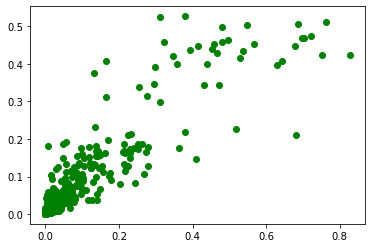

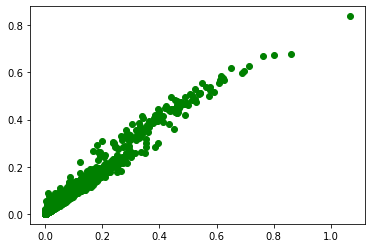

In [69]:
plt.scatter(df_test[TARGET], df_test['prediction'],color='g')
plt.show()

plt.scatter(df_train[TARGET], df_train['prediction'],color='g')
#plt.plot(df_train[TARGET], df_train['prediction'],color='k')
plt.show()

In [ ]:
df_train.to_excel("df_train_randomforest.xlsx")
df_test.to_excel("df_teste_randomforest.xlsx")

### *Random Forest Regressor* - Importância das variáveis

O gráfico abaixo mostra a importância das variáveis com base na impureza (*impurity-based feature importances*). Para utilizadores mais experientes, existem outras formas de análise, por exemplo, a importância baseada na permutação (*permutation-based feature importances*) ou *SHAP Analysis*. Para o algoritmo *Random Forest Regressor* a importância das variáveis é uma média da importância das várias árvores que compõem o modelo.

Note-se que representa um valor relativo da importância, não podendo ser interpretado diretamente como o peso da variável na previsão. 

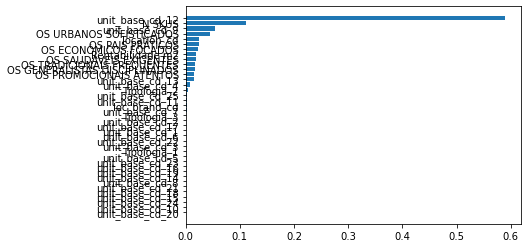

In [68]:
def f_importances_wo_title(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

# Obter a importância das variáveis da Random Forest
f_importances_wo_title(rfo.feature_importances_, rfo.feature_names_in_)

### Analisar e validar os resultados do modelo desenvolvido



### Exportar os resultados

Para escrever os dados num ficheiro Excel no nosso sistema, é necessário especificar o nome do ficheiro e também o nome da folha em que se pretende escrever os dados.

Para exportar os resultados, é necessário alterar o nome das variáveis:
- `EXCEL_FILE_PATH` - Nome do ficheiro a ser criado no nosso sistema (será criado no diretório onde está o ficheiro que estamos a correr)
- `SHEET_NAME` - Nome da *Sheet* para escrever os resultados

**NOTAS IMPORTANTES !!!**:
- Os resultados exportados serão sempre os do último modelo a ser corrido
- Se for usado o mesmo nome de ficheiro, uma nova exportação gravará por cima da anterior. Se quisermos guardar várias exportações em ficheiros separados, é necessário alterar o nome do ficheiro para o qual os resultados são gravados

In [ ]:
EXCEL_FILE_PATH = r'results.xlsx' 
SHEET_NAME = 'results'

# Combinar os datasets de treino e teste
df_results = pd.concat([df_test, df_train])

# Escrever os resultados para um ficheiro Excel
df_results.to_excel(EXCEL_FILE_PATH, sheet_name=SHEET_NAME)